<a href="https://colab.research.google.com/github/Drkareemkamal/The-Sparks-Foundation/blob/main/Iris_Classification_by_RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation: Data Science and Business Analytics Tasks

# Task : Predicting Iris using `Random Forest Classifier`

In [ ]:
!unzip /content/iris.zip

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import plotly.express as px

## load Data using `pd.read_csv`

In [ ]:
df = pd.read_csv('/content/Iris.csv',)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Inspect data
  - check data types
  - check mean median mode outliers
  - check missing value

In [ ]:
# Remove the name 'Iris'
df['Species'] = df.Species.str.replace('Iris-', '')
# Drop the 'Id' column
df = df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Check missing Values

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Check target label numbers it should be balanced between different classes

In [ ]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [ ]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: xlabel='Species'>

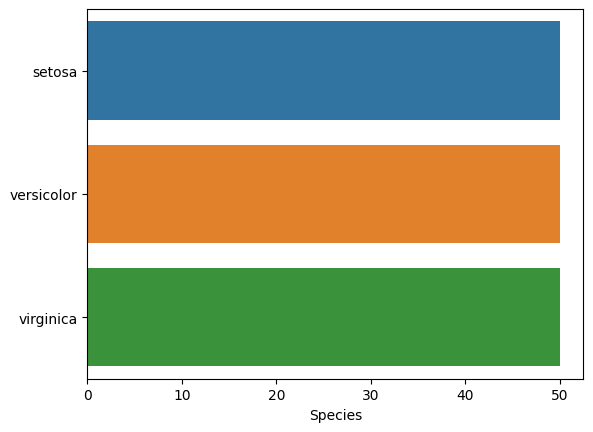

In [ ]:
sns.barplot(x=df['Species'].value_counts(),y=df['Species'].unique(),data=df)

## Data Visualization

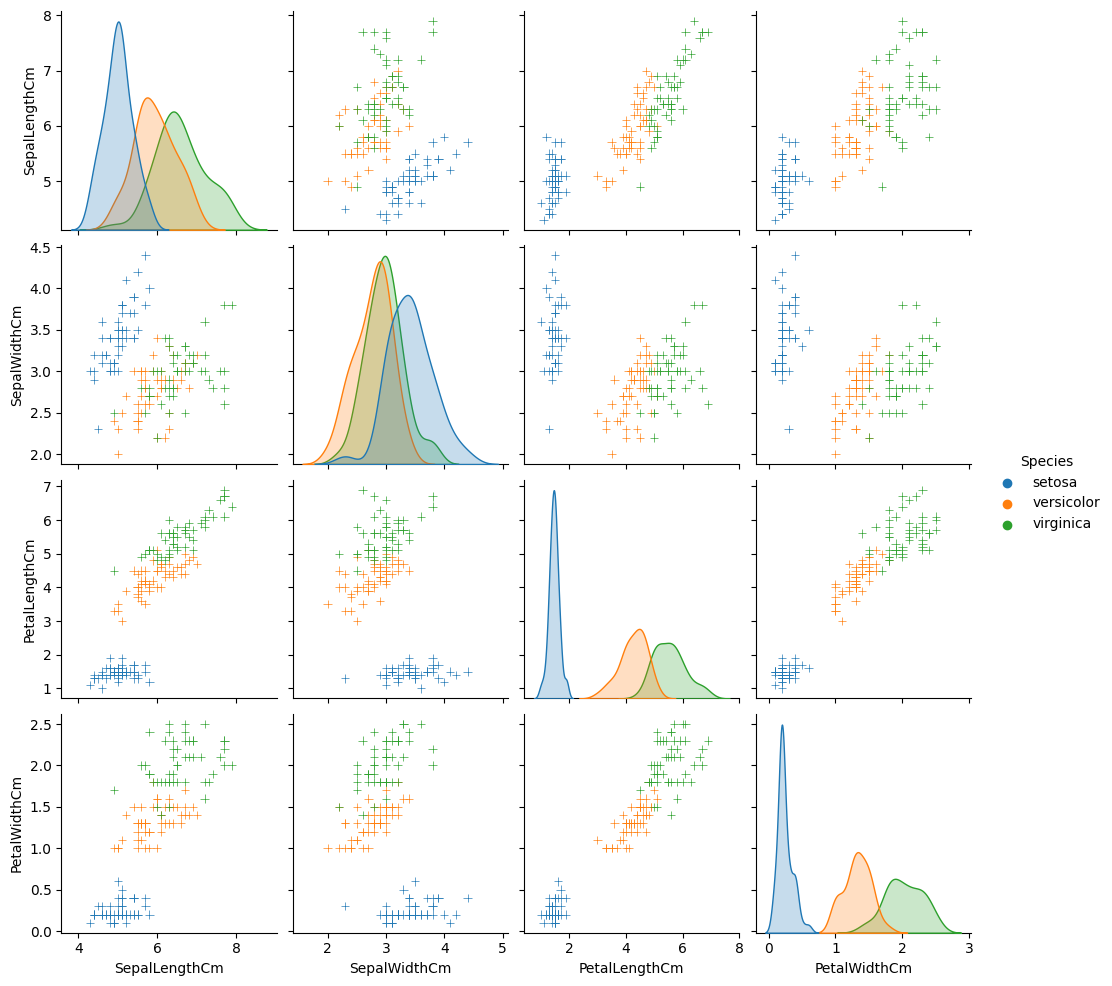

In [ ]:
m = sns.pairplot(df, hue='Species', markers='+')
plt.show()


## Data Preprocessing

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , f1_score , confusion_matrix , classification_report , recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

## Set X,y and split the data using `train_test_split`




In [ ]:
X = df.drop('Species',axis=1)
y = df['Species']


In [ ]:
x_train, x_test , y_train , y_test = train_test_split(X,
                                                      y,
                                                      test_size=0.2)


In [ ]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

## Using `RandomForest Classifier` for iris Classification

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train_sc,y_train)
y_pred_RFC = rfc.predict(x_test_sc)
acc_RFC = accuracy_score(y_test,y_pred_RFC)

In [ ]:
acc_RFC

0.9333333333333333

## Using `Support Vector Machine` for Iris Classification

In [ ]:
clf = SVC()
clf.fit(x_train_sc,y_train)
y_pred_svc = clf.predict(x_test_sc)
acc_svc = accuracy_score(y_test,y_pred_svc)

In [ ]:
acc_svc

0.9333333333333333

In [ ]:
METRICS = {'accuracy_score': accuracy_score ,
           'precision_score':precision_score ,
           'f1_score' : f1_score ,
           'recall_score' : recall_score,
           'confusion_matrix' : confusion_matrix ,
           'classification_report': classification_report}
def train_and_prediction(model,x_train,x_test,y_train,y_test,metrics=METRICS):
  if model == 'LogisticcRegression':
    model.fit(x_train_sc,y_train)
    y_pred = model.predict(x_test_sc)

  else :
    clf = model
    clf.fit(x_train_sc,y_train)
    y_pred = clf.predict(x_test_sc)

  for k,v in metrics.items() :
    if k == 'precision_score' or k == 'f1_score' or k == 'recall_score' :
      tryy = v(y_test,y_pred,average='macro')
      print(f'The {k}  is {tryy:1f}')

    else:
      print(f'The {k}  is {v(y_test,y_pred)}')






In [ ]:
RF = train_and_prediction(RandomForestClassifier(),x_train,x_test,y_train,y_test,metrics=METRICS)

The accuracy_score  is 0.9333333333333333
The precision_score  is 0.925926
The f1_score  is 0.928030
The recall_score  is 0.944444
The confusion_matrix  is [[11  0  0]
 [ 0  7  0]
 [ 0  2 10]]
The classification_report  is               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.78      1.00      0.88         7
   virginica       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



### Confusion Matrix for RFC

<Axes: >

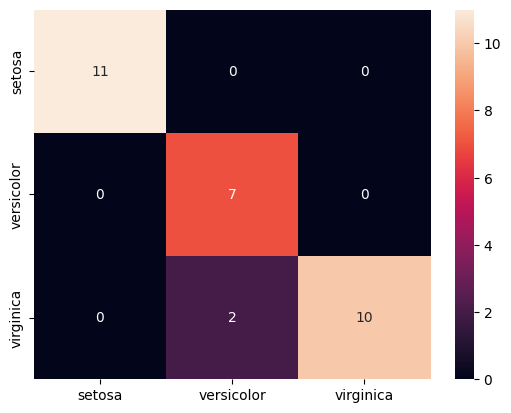

In [ ]:
cm = confusion_matrix(y_test,y_pred_RFC)
sns.heatmap(cm,
            xticklabels = df['Species'].unique(),
            yticklabels = df['Species'].unique(),
            annot=True)

<Axes: >

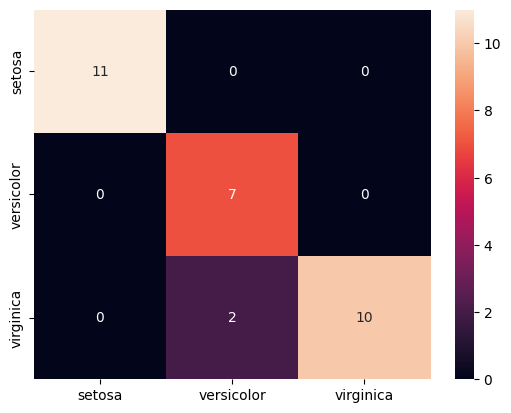

In [ ]:
cm_svc = confusion_matrix(y_test,y_pred_svc)
sns.heatmap(cm_svc,
            xticklabels = df['Species'].unique(),
            yticklabels = df['Species'].unique(),
            annot=True)

*italicized text*## Comparasion between `RFC` , `SVC`

In [ ]:
result = pd.DataFrame({'RFC ': acc_RFC,
                       'SVC ': acc_svc},
                      index=['Accuracy Score'])

<Axes: >

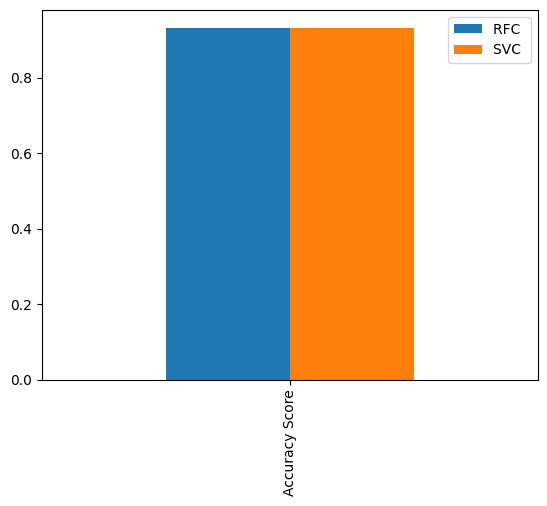

In [ ]:
result.plot(kind='bar')

In [ ]:
# Create a DataFrame of the actual and predicted targets
Prediction_data =pd.DataFrame({'Actual values':y_test.ravel(),'Predicted Values':y_pred_RFC.ravel()})
Prediction_data

,Actual values,Predicted Values
0,virginica,virginica
1,setosa,setosa
2,virginica,virginica
3,virginica,virginica
4,virginica,versicolor
5,virginica,virginica
6,virginica,virginica
7,setosa,setosa
8,versicolor,versicolor
9,setosa,setosa
